In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
data = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']].copy()

data

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


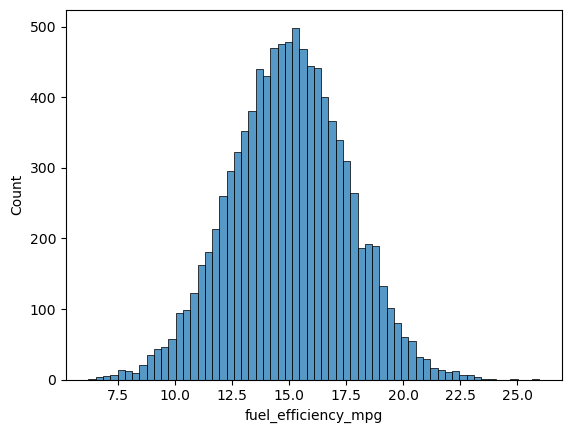

In [6]:
%matplotlib inline
sns.histplot(data.fuel_efficiency_mpg)
plt.show()

In [9]:
data.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [10]:
data.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [22]:
horsepower_mean = data.horsepower.median()

horsepower_mean

149.0

In [13]:
n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_train, n_val, n_test


(5824, 1940, 1940)

In [14]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

data_train = data.iloc[idx[:n_train]].copy()
data_val = data.iloc[idx[n_train:n_train+n_val]].copy()
data_test = data.iloc[idx[n_train+n_val:]].copy()

In [15]:
len(data_train), len(data_val), len(data_test)

(5824, 1940, 1940)

In [16]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [17]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [19]:
X_columns = [
    "engine_displacement",
    "horsepower",
    "vehicle_weight",
    "model_year"
]

y_column = "fuel_efficiency_mpg"

In [ ]:
# Fill missing values with zero
X_train_zero = data_train[X_columns].fillna(0).values
y_train = data_train[y_column].values

X_val_zero = data_val[X_columns].fillna(0).values
y_val = data_val[y_column].values

w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

rmse_zero = round(rmse(y_val, y_pred_zero), 2)
rmse_zero

0.52

In [ ]:
# Fill missing values with mean
X_train_mean = data_train[X_columns].fillna(horsepower_mean).values
y_train = data_train[y_column].values

X_val_mean = data_val[X_columns].fillna(horsepower_mean).values
y_val = data_val[y_column].values

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

rmse_mean = round(rmse(y_val, y_pred_mean), 2)
rmse_mean

0.46

In [24]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)

    y_pred = w0 + X_val_zero.dot(w)
    score = rmse(y_val, y_pred)
    
    print(f'r = {r} | RMSE = {round(score, 2)}')

r = 0 | RMSE = 0.52
r = 0.01 | RMSE = 0.52
r = 0.1 | RMSE = 0.52
r = 1 | RMSE = 0.52
r = 5 | RMSE = 0.52
r = 10 | RMSE = 0.52
r = 100 | RMSE = 0.52


In [29]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []

for s in seed:
    np.random.seed(s)
    np.random.shuffle(idx)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    data_train = data.iloc[idx[:n_train]].copy()
    data_val = data.iloc[idx[n_train:n_train+n_val]].copy()
    data_test = data.iloc[idx[n_train+n_val:]].copy()

    X_train_zero = data_train[X_columns].fillna(0).values
    y_train = data_train[y_column].values

    X_val_zero = data_val[X_columns].fillna(0).values
    y_val = data_val[y_column].values

    w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
    y_pred_zero = w0_zero + X_val_zero.dot(w_zero)
    rmse_zero = round(rmse(y_val, y_pred_zero), 3)

    rmse_list.append(rmse_zero)

    print(f'seed = {s} | RMSE = {rmse_zero}')

    

seed = 0 | RMSE = 0.516
seed = 1 | RMSE = 0.519
seed = 2 | RMSE = 0.524
seed = 3 | RMSE = 0.523
seed = 4 | RMSE = 0.524
seed = 5 | RMSE = 0.514
seed = 6 | RMSE = 0.523
seed = 7 | RMSE = 0.525
seed = 8 | RMSE = 0.532
seed = 9 | RMSE = 0.513


In [32]:
std_dev = round(np.std(rmse_list), 3)
std_dev

0.006

In [33]:
np.random.seed(9)

n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

data_train = data.iloc[idx[:n_train]].copy()
data_val = data.iloc[idx[n_train:n_train+n_val]].copy()
data_test = data.iloc[idx[n_train+n_val:]].copy()

data_train_val = pd.concat([data_train, data_val]).reset_index(drop=True)

In [34]:
X_train_val = data_train_val[X_columns].fillna(0).values
y_train_val = data_train_val[y_column].values

X_test = data_test[X_columns].fillna(0).values
y_test = data_test[y_column].values

w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

y_pred_test = w0 + X_test.dot(w)
rmse_test = round(rmse(y_test, y_pred_test), 3)

rmse_test

0.516